In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('white')
sns.set_context('talk')
import scipy.stats as stats
import math
import csv

import pyNetLogo


## pyNetLogo

In [ ]:
import timeit

In [4]:
netlogo = pyNetLogo.NetLogoLink(gui=True)
netlogo.load_model('../Model.nlogo')

FileNotFoundError: 

In [ ]:
netlogo.command('setup')

In [ ]:
import time
start_time = time.time()
netlogo.repeat_command("go", 100)
print("--- %s seconds ---" % (time.time() - start_time))

In [5]:
netlogo.kill_workspace()

In [ ]:
coor = netlogo.patch_report('fee')
coor = coor.to_numpy()

In [ ]:
coor[np.where(coor > 0)] = 0

In [ ]:
netlogo.report('num-cars')

In [ ]:
colors = netlogo.patch_report('pcolor')
fees = netlogo.patch_report('fee')
lot_colors = netlogo.report("lot-colors")

In [ ]:
lot_masks = dict()
for i, c in enumerate(['yellow', 'orange', 'green', 'blue']):
    lot_masks[c] = colors == lot_colors[i]

In [ ]:
pd.set_option('display.max_rows', 91)
pd.set_option('display.max_columns', 91)
fees[lot_masks['yellow']]= fees[lot_masks['yellow']] + 1

In [ ]:
netlogo.patch_set("fee", fees)

In [ ]:
temporal_resolution = netlogo.report("temporal-resolution")

In [ ]:
temporal_resolution

In [ ]:
pd.set_option('display.max_rows', 91)
pd.set_option('display.max_columns', 91)

fees[colors==lot_colors[1]]

In [ ]:
np.unique(fees[colors==lot_color[1]].to_numpy()[~np.isnan(fees[colors==lot_color[1]].to_numpy())])

In [ ]:
fees[colors==lot_color[1]].value_counts()

In [ ]:
netlogo.patch_set("pcolor", colors.mask(colors==lot_color[0], lot_color[3]))

In [ ]:
coor.to_numpy()

## Error Analysis

In [2]:
def get_and_plot(episode_path):
    """
    """
    capacity_i = 0
    fee_i = 0
    with open(episode_path, newline='') as csvfile:
        file_reader = csv.reader(csvfile, delimiter=',', quotechar='"')
        for i, row in enumerate(file_reader):
            if '"Utilized Capacity at Different Lots"' in row:
                capacity_i = i
            elif '"Dynamic Fee of Different Lots"' in row:
                fee_i = i
    
    fee_df = pd.read_csv(episode_path, skiprows=fee_i + 11, nrows=21601)
    fee_df = fee_df.rename(columns={"y": "yellow_lot_fee", "y.1": "orange_lot_fee", "y.2" : "green_lot_fee", "y.3" : "blue_lot_fee"})
    
    occup_df = pd.read_csv(episode_path, skiprows=capacity_i + 12, nrows=21601)
    occup_df = occup_df.rename(columns={"y": "blue_lot_occup", "y.1": "yellow_lot_occup", "y.2" : "green_lot_occup", "y.3" : "orange_lot_occup"})
    
    fig, axs = plt.subplots(2, 1, figsize=(20, 15))
    axs[0].set_title("Dynamic Fees")
    axs[0].plot(fee_df.x, fee_df.yellow_lot_fee, linewidth=3, color="yellow")
    axs[0].plot(fee_df.x, fee_df.orange_lot_fee, linewidth=3, color="orange")
    axs[0].plot(fee_df.x, fee_df.green_lot_fee, linewidth=3, color="green")
    axs[0].plot(fee_df.x, fee_df.blue_lot_fee, linewidth=3, color="blue")

        # plt.xticks(fontsize=15)
    axs[0].set_ylabel('Fee', fontsize=22)
    #axs[0].set_xlabel('Timesteps', fontsize=22)
    axs[0].grid(True)
    axs[0].tick_params(axis="y", labelsize=15)
    axs[0].tick_params(axis="x", labelsize=15)
    
    axs[1].set_title("Occupancy")
    axs[1].plot(occup_df.x, occup_df.yellow_lot_occup, linewidth=1, color="yellow")
    axs[1].plot(occup_df.x, occup_df.orange_lot_occup, linewidth=1, color="orange")
    axs[1].plot(occup_df.x, occup_df.green_lot_occup, linewidth=1, color="green")
    axs[1].plot(occup_df.x, occup_df.blue_lot_occup, linewidth=1, color="blue")
    axs[1].plot(occup_df.x, [75] * len(occup_df.x), linewidth=2, color="red", linestyle='dashed')
    axs[1].plot(occup_df.x, [90] * len(occup_df.x), linewidth=2, color="red", linestyle='dashed')

    # plt.xticks(fontsize=15)
    axs[1].set_ylabel('Occupancy', fontsize=22)
    axs[1].set_xlabel('Timesteps', fontsize=22)
    axs[1].grid(True)
    axs[1].tick_params(axis="y", labelsize=15)
    axs[1].tick_params(axis="x", labelsize=15)

In [3]:
def old_reward(x):
    """
    """
    if 75 < x < 90:
        return 500
    elif x <= 75:
            return -((x - 75) ** 2)
    elif x >= 90:
        return -((x - 90) ** 3)

In [4]:
def shaped_reward(x):
    """
    """
    return 1 - (abs(x-82.5)/82.5) ** 0.4

In [5]:
def simple_reward(x):
    """
    """
    if 75 < x < 90:
        return 1
    else:
        return -1

In [6]:
def plot_reward_function(reward_function):
    """
    """
    x = np.arange (0, 100, 0.5)
    y = [reward_function(val) for val in x]
    plt.plot(x, y)
    plt.show()

In [7]:
def plot_results(path):
    """
    """
    df = pd.read_csv(path)

    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(range(len(df)), df.mean_reward, linewidth=3)
    ax.plot(range(len(df.mean_reward.rolling(10).mean())), df.mean_reward.rolling(10).mean(), linewidth=3, color="red")
    # plt.xticks(fontsize=15)
    ax.set_ylabel('Mean Reward', fontsize=22)
    ax.set_xlabel('# Episodes', fontsize=22)
    ax.grid(True)
    ax.tick_params(axis="y", labelsize=15)
    ax.tick_params(axis="x", labelsize=15)

## First Attempt at Reward function

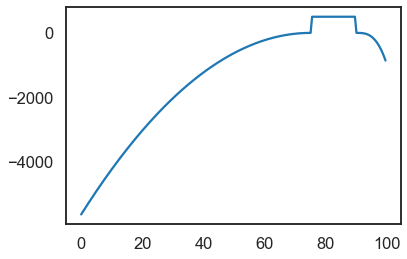

In [8]:
plot_reward_function(old_reward)

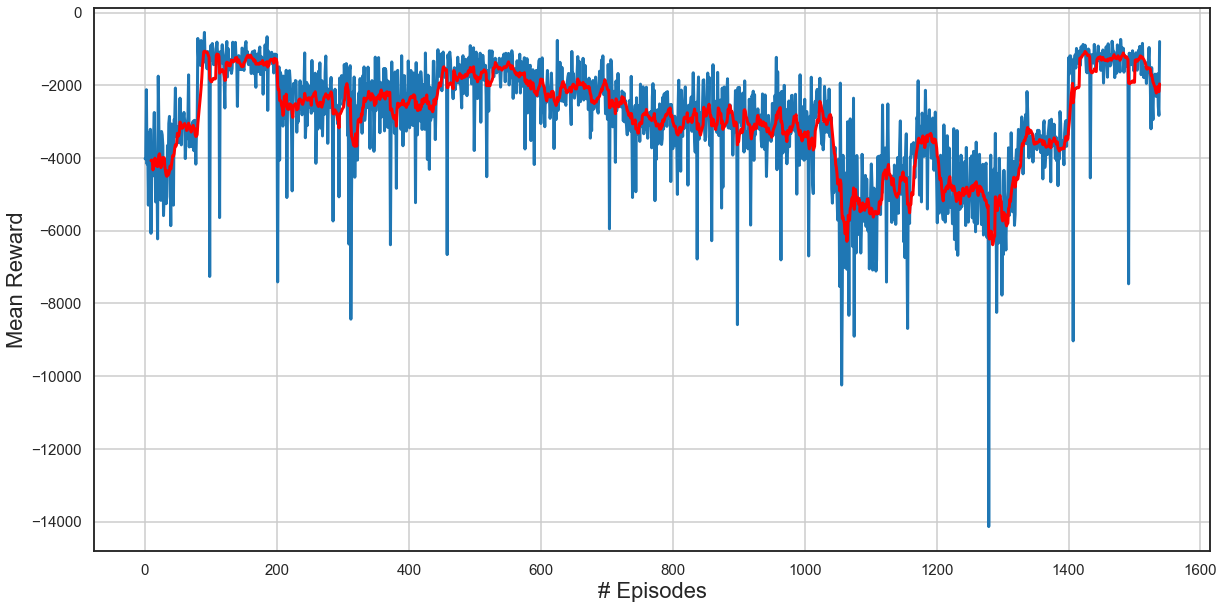

In [9]:
plot_results('result_old_long.csv')

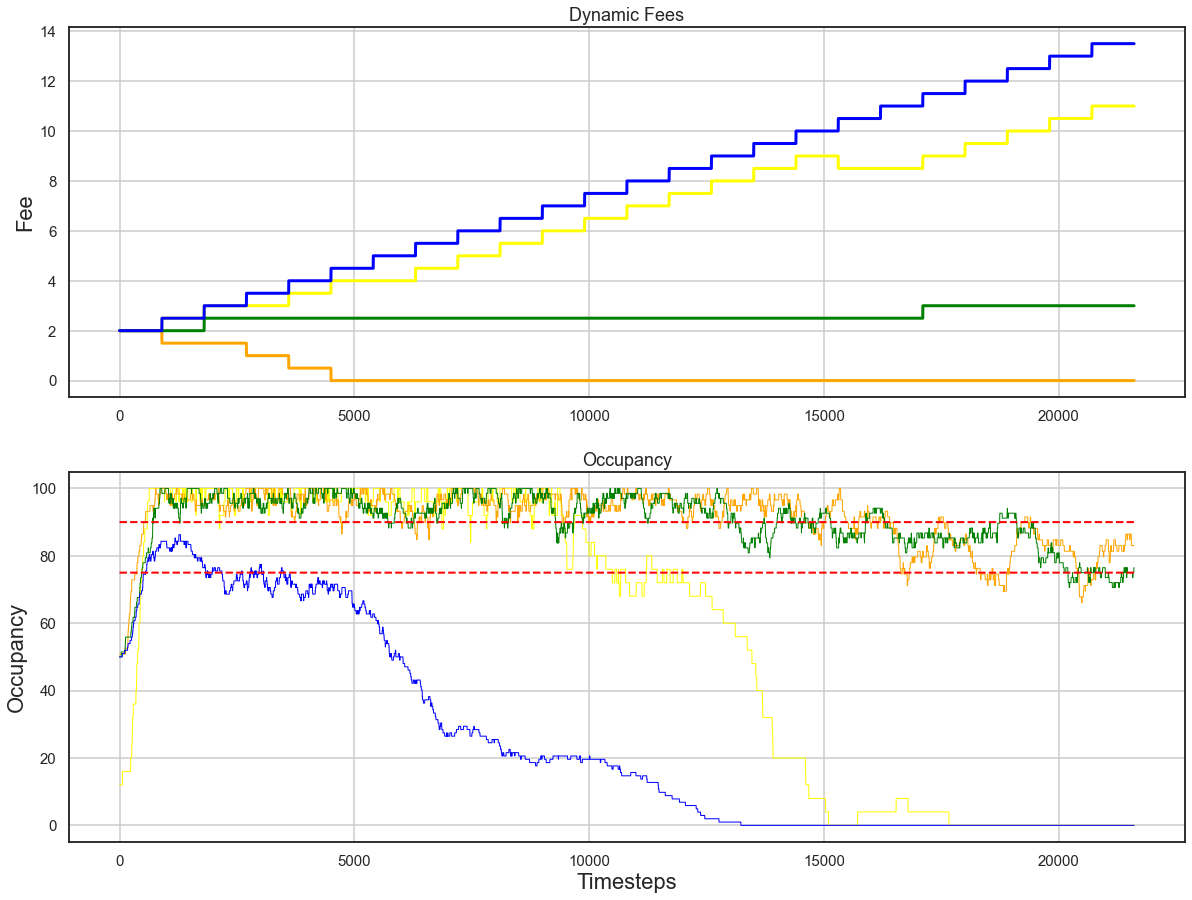

In [10]:
get_and_plot('old_E3.csv')

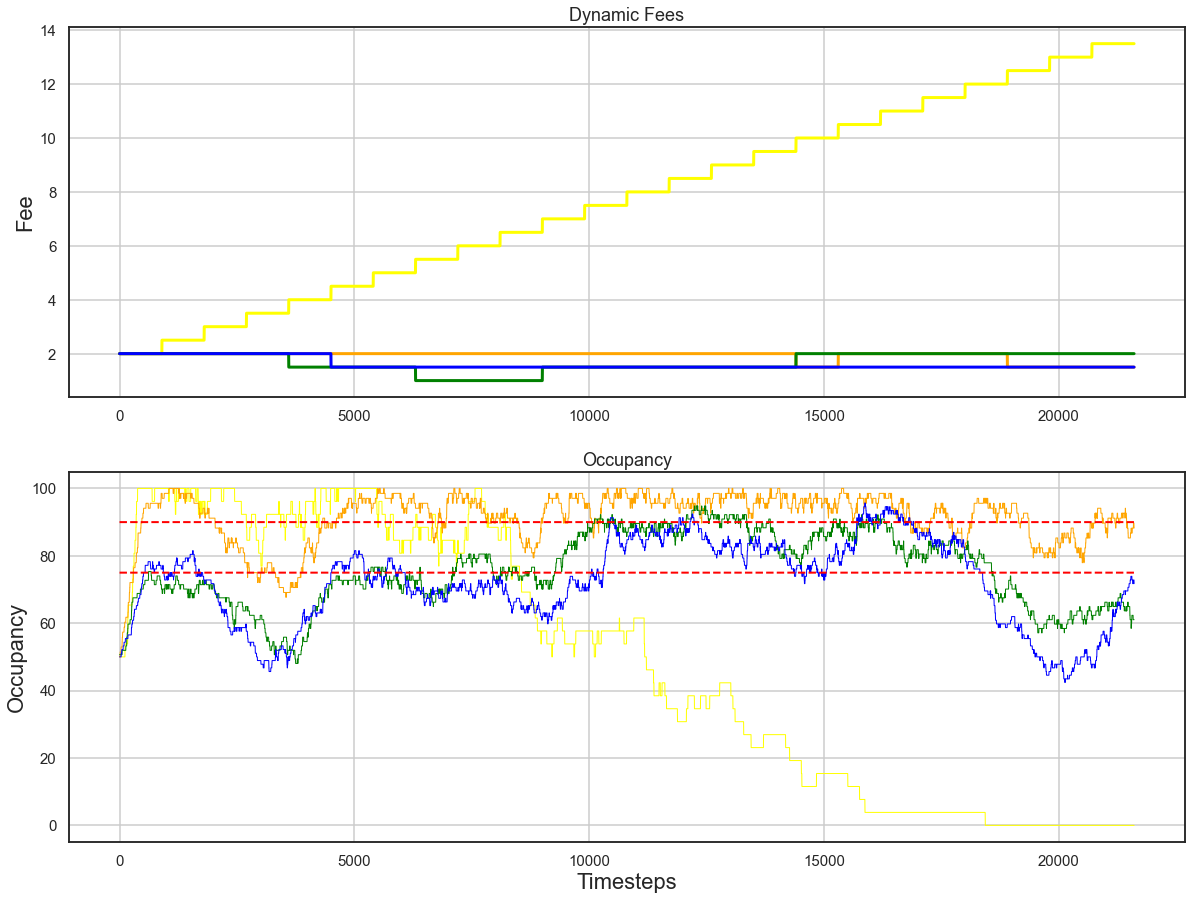

In [11]:
get_and_plot('old_E1518.csv')

## Shaped Reward

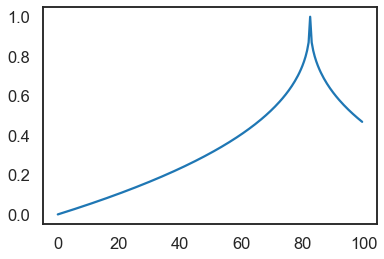

In [12]:
plot_reward_function(shaped_reward)

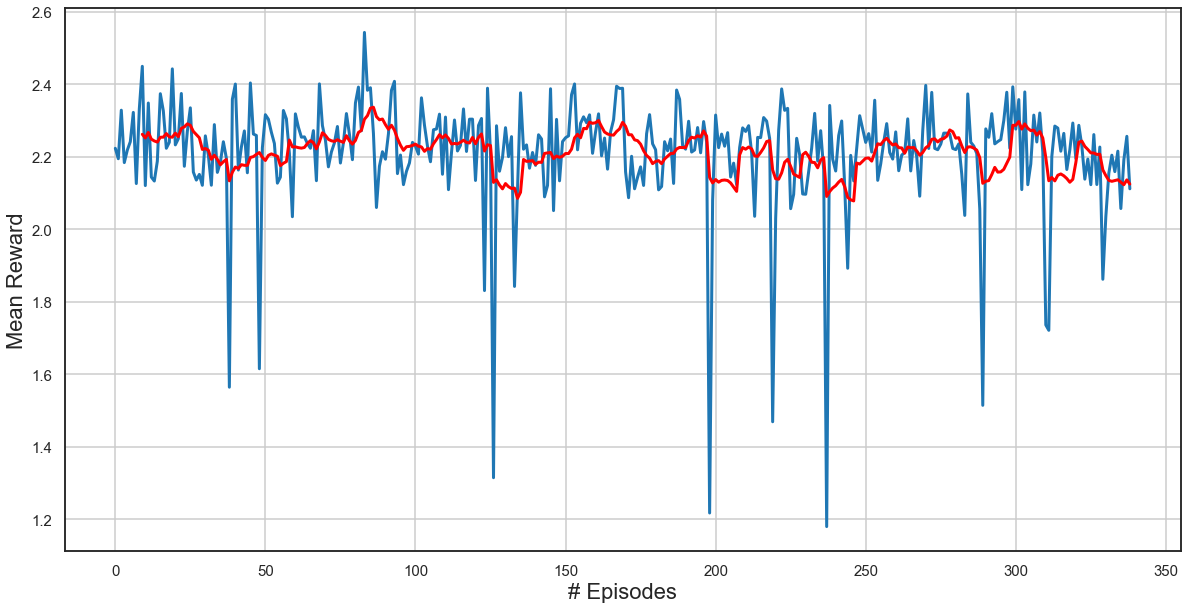

In [13]:
plot_results('result_shaped.csv')

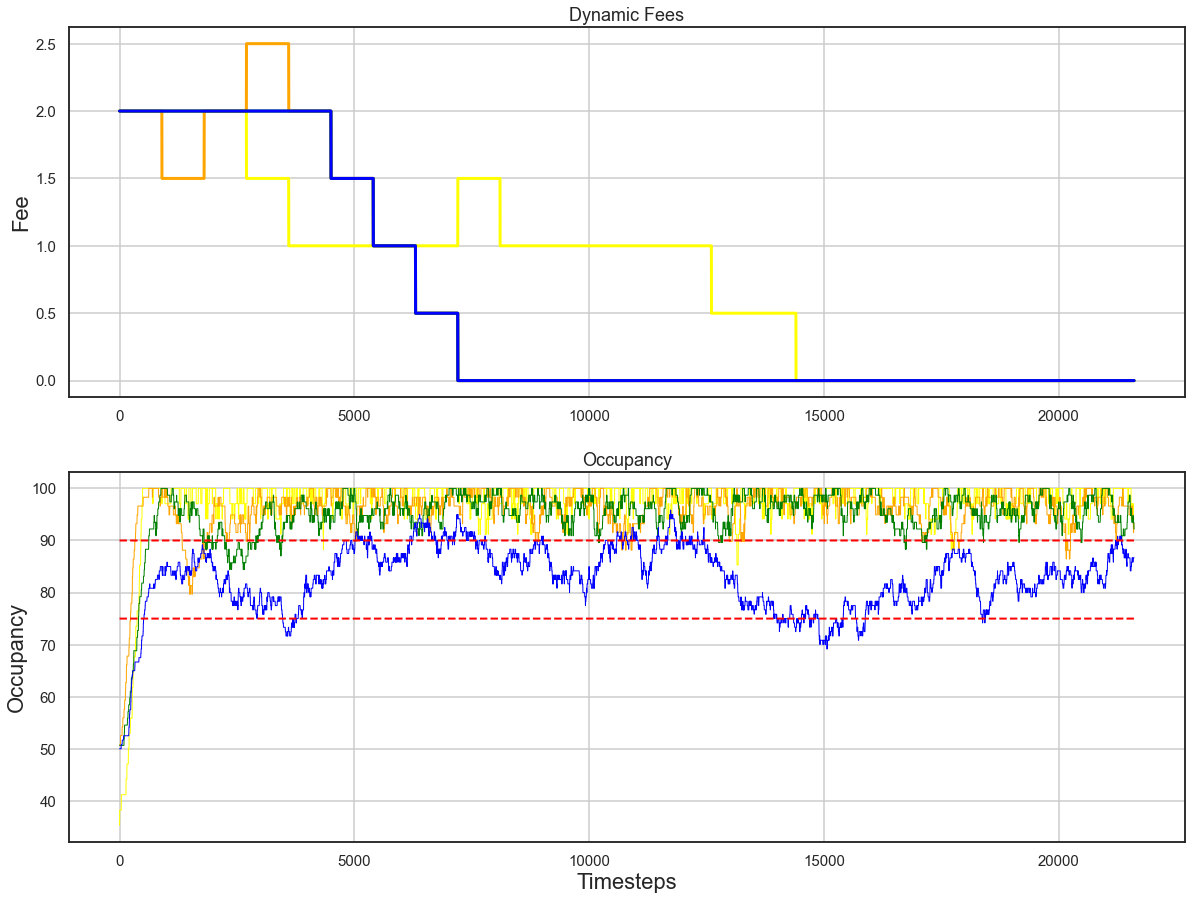

In [14]:
get_and_plot("shaped_E1.csv")

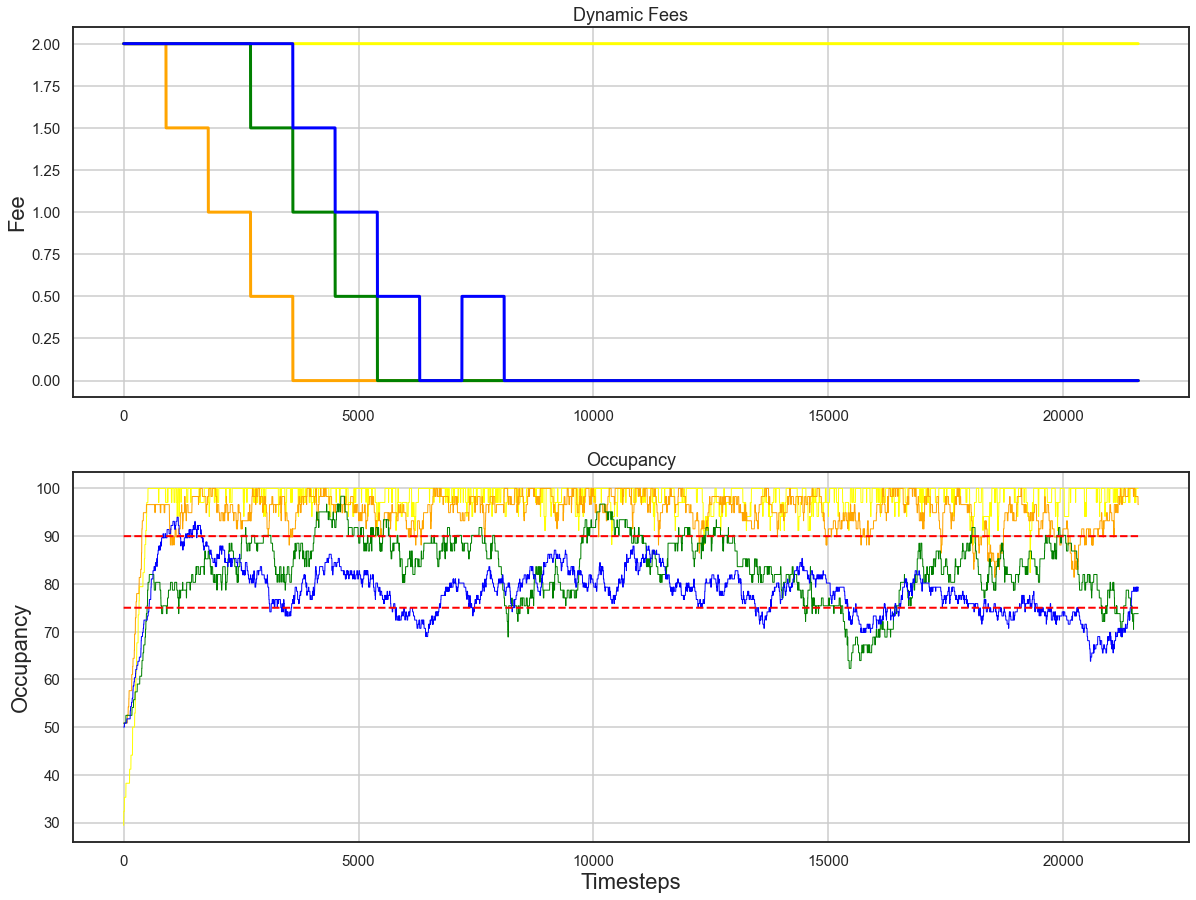

In [15]:
get_and_plot("shaped_E300.csv")

## Simple Reward

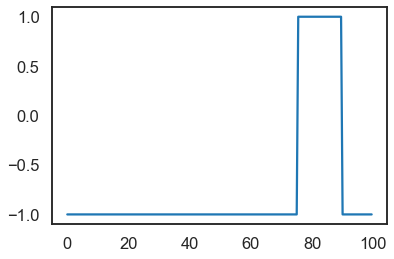

In [16]:
plot_reward_function(simple_reward)

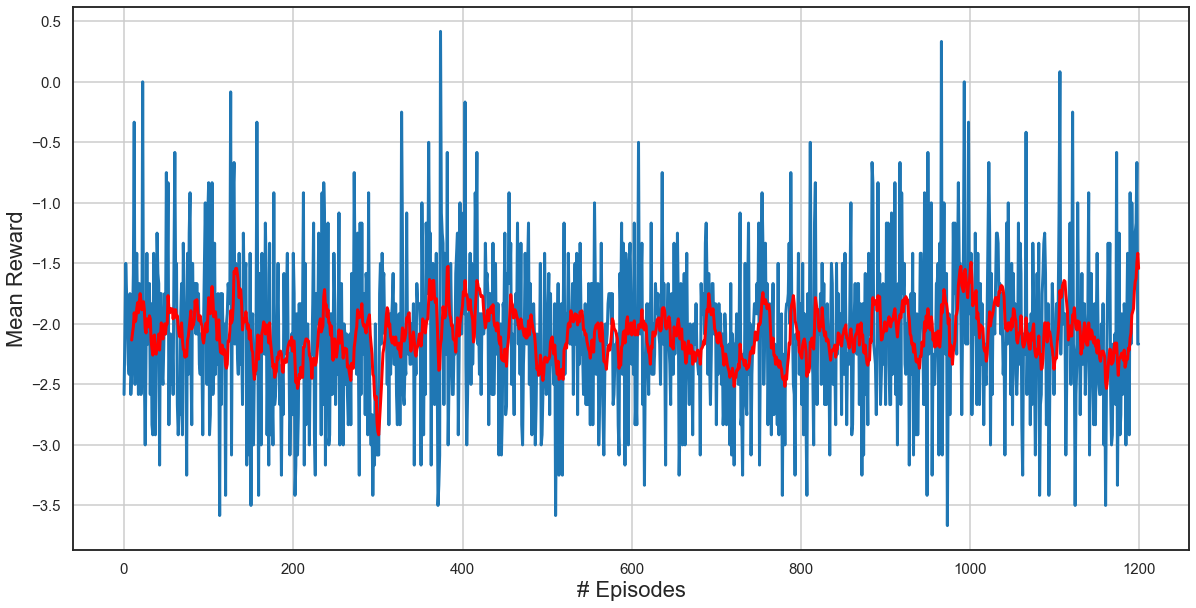

In [17]:
plot_results('result_simple_long.csv')

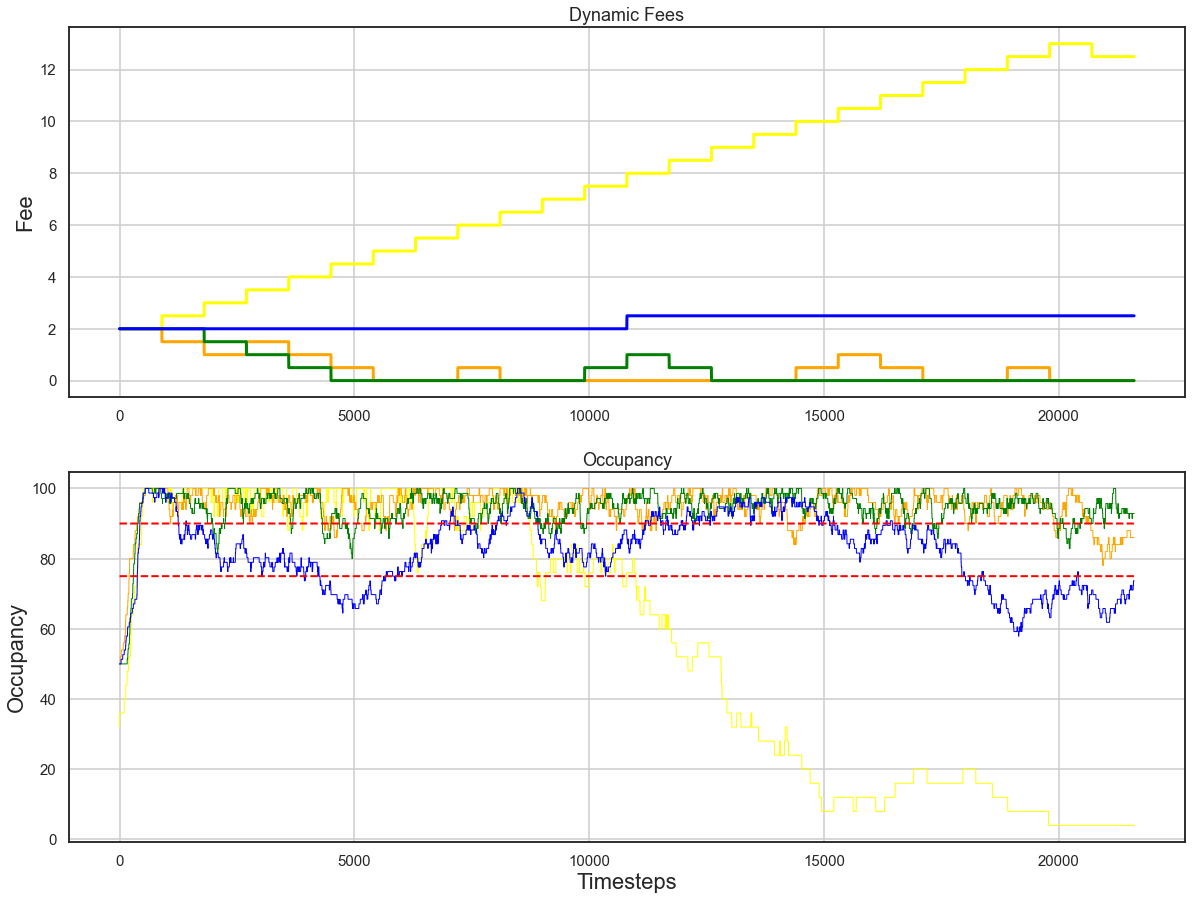

In [18]:
get_and_plot("simple_E1.csv")

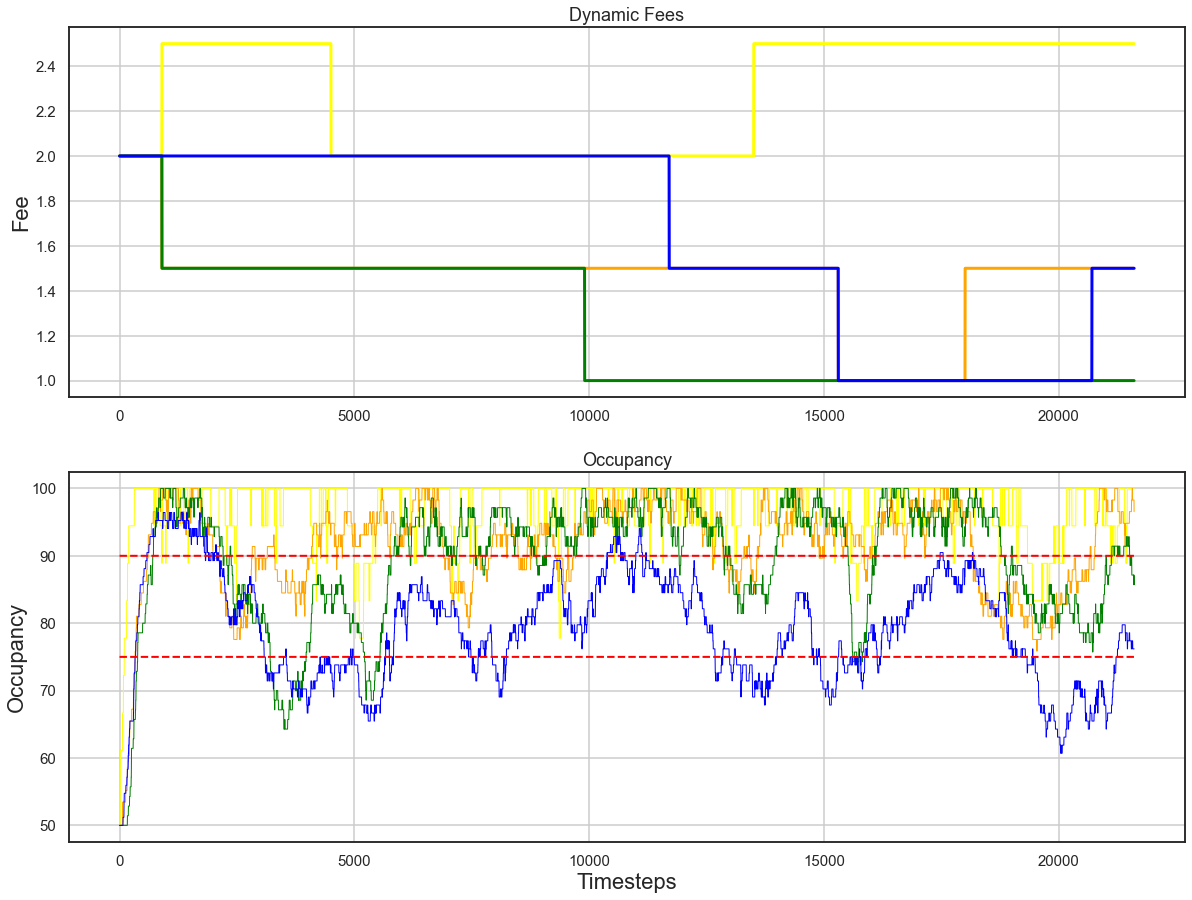

In [19]:
get_and_plot("simple_E1193.csv")